In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_curves(lists, labels, title, x_label, y_label):
    # lists: a list of lists (or arrays) to plot
    # labels: a list of labels for each curve
    # title: the title of the plot
    # x_label: the label for the x-axis
    # y_label: the label for the y-axis
    
    if len(lists) != len(labels):
        raise ValueError("Number of lists and labels should be the same.")
    
    for i in range(len(lists)):
        plt.plot(lists[i], label=labels[i])

    fig = plt.gcf()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()
    fig.savefig('plots.png')
    

def plot(index, lst, title, x, y, start_idx):
    r1 = lst[0][index][start_idx:]
    r2 = lst[1][index][start_idx:]
    r3 = lst[2][index][start_idx:]
    r4 = lst[3][index][start_idx:]

    lists_to_plot = [r1, r2, r3, r4]
    legend_labels = ['LDA', 'SLDA', 'ETM', 'no topic'] 
    plot_curves(lists_to_plot, legend_labels, title, x, y)

'''
Calculate the average runtime and median runtime of each run, in minutes
'''
def get_time_info(lst, index):
    times = lst[index][0]
    return np.mean(times)/60, np.median(times)/60


'''
Index 
0: Training accuracy
1: Purity
2: Rand Index
3: Normalized Mutual Information
4: Testing Accuracy
5: Testing Purity
6: Testing Rand Index
7: Testing normalized mutual information
'''
def plot_two(index, lst, title, x, y, start_idx, end_idx, legend_labels, take_median = False):
    # r1 = lst[0][index][start_idx:end_idx]
    # r2 = lst[1][index][start_idx:end_idx]
    # lists_to_plot = [r1, r2,]

    '''
    If uses take median, then it's saved in multiple runs. Take the median
    of multiple runs
    '''
    if take_median == True:
        # print(np.median(lst[1][index], axis=0).shape)
        lists_to_plot = [np.median(lst[i][index], axis = 0)[start_idx:end_idx] for i,ele in enumerate(lst)]
        # for ele in lists_to_plot:
        #     print(ele.shape)
    else:
        # print('take no median')
        lists_to_plot = [lst[i][index][start_idx:end_idx] for i,ele in enumerate(lst)]
    plot_curves(lists_to_plot, legend_labels[:len(lists_to_plot)], title, x, y)

def significance_test(data1, data2):
    # Independent Two-Sample t-test
    t_stat, p_val_t = stats.ttest_ind(data1, data2)
    print(f"t-test p-value: {p_val_t}")

    # Welch's t-test
    t_stat_welch, p_val_welch = stats.ttest_ind(data1, data2, equal_var=False)
    print(f"Welch's t-test p-value: {p_val_welch}")

    # Mann-Whitney U test
    u_stat, p_val_mann = stats.mannwhitneyu(data1, data2, alternative='two-sided')  # 'two-sided' for a two-tailed test
    print(f"Mann-Whitney U test p-value: {p_val_mann}")

In [3]:
# lists = np.load('./model_testing_results/19_topics_10000_concat.npy')
active = np.load('./model_testing_results/regularized_log_testing/baseline_test_docs_regularized_5_runs.npy', allow_pickle=True)
LDA = np.load('./model_testing_results/regularized_log_testing/16_topics_LDA_test_docs_regularized_5_runs.npy', allow_pickle=True)
SLDA = np.load('./model_testing_results/regularized_log_testing/16_topics_SLDA_test_docs_regularized_5_runs.npy', allow_pickle=True)
CTM = np.load('./model_testing_results/regularized_log_testing/16_topics_CTM_test_docs_regularized_5_runs.npy', allow_pickle=True)
sCTM = np.load('./model_testing_results/16_topics_SCTM_test_docs_regularized_one_run.npy', allow_pickle=True)
# active_batch = np.load('./model_testing_results/baseline_test_docs_one_run.npy', allow_pickle=True)
# ETM = np.load('./model_testing_results/20_topics_ETM.npy')
# PLDA = np.load('./model_testing_results/16_topics_PLDA.npy')
# LLDA = np.load('./model_testing_results/16_topics_LLDA.npy')
# active = np.load('./model_testing_results/baseline_test_docs_one_run.npy', allow_pickle=True)
# LDA = np.load('./model_testing_results/one_run/16_topics_LDA.npy', allow_pickle=True)
# SLDA = np.load('./model_testing_results/one_run/16_topics_SLDA.npy', allow_pickle=True)
# BERTOPIC = np.load('./model_testing_results/one_run/16_topics_BERTOPIC.npy')
lists = [LDA, active, SLDA, CTM]
lengends = ['LDA', 'clf', 'sLDA', 'CTM']
# lists = [active, active_batch]
# lengends = ['clf', 'batch clf']

In [36]:
np.median(active[1], axis=0)[500]

0.6829337494680097

In [3]:
CTM[0][1000]

0.6805220598666477

In [4]:
significance_test(active[2], active_batch[2])

NameError: name 'active_batch' is not defined

In [4]:
'''
Get the MSE difference between two lists
'''
def get_abs_difference(accuracies_model1, accuracies_model2, start, end):
    # assert len(accuracies_model1) == len(accuracies_model2)

    mse = sum((a - b) ** 2 for a, b in zip(accuracies_model1, accuracies_model2)) / len(accuracies_model1)

    return mse

type = 'CTM'
LDA_concate = np.load('./model_testing_results/log_testing/{}_test_docs_5_runs_16_topics.npy'.format(type), allow_pickle=True)
LDA = np.load('./model_testing_results/log_testing/{}_test_docs_5_runs_topics_features_only_16_topics.npy'.format(type), allow_pickle=True)
lists = [LDA_concate, LDA]
lengends = ['{} with TF-IDF'.format(type), '{}'.format(type)]
# plot_two(0, lists, 'Accuracy vs. num docs labeled', 'num doc labeled', 'Train Accuracy', 0,500, lengends, True)
print(get_abs_difference(np.median(LDA_concate[0], axis=0), np.median(LDA[0], axis=0), 0, 7000))

0.2207107117286496


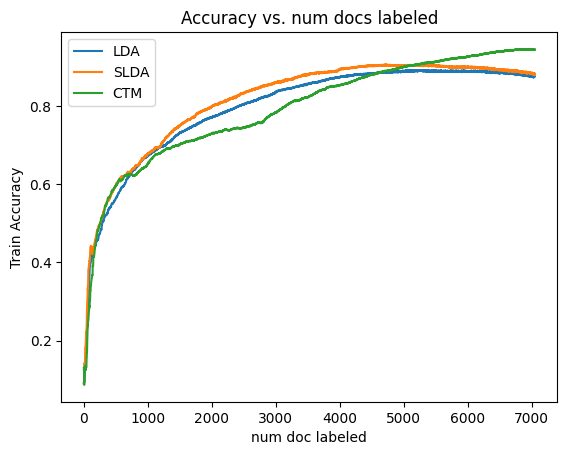

In [5]:
LDA_concate = np.load('./model_testing_results/log_testing/LDA_test_docs_5_runs_16_topics.npy', allow_pickle=True)
SLDA_concate = np.load('./model_testing_results/log_testing/SLDA_test_docs_5_runs_16_topics.npy', allow_pickle=True)
CTM_concate = np.load('./model_testing_results/log_testing/CTM_test_docs_5_runs_16_topics.npy', allow_pickle=True)
lists = [LDA_concate, SLDA_concate, CTM_concate]
lengends = ['LDA', "SLDA", 'CTM']
get_abs_difference(np.median(SLDA_concate[0], axis=0), np.median(CTM_concate[0], axis=0), 0, 7000)
plot_two(0, lists, 'Accuracy vs. num docs labeled', 'num doc labeled', 'Train Accuracy', 0,71000, lengends, True)

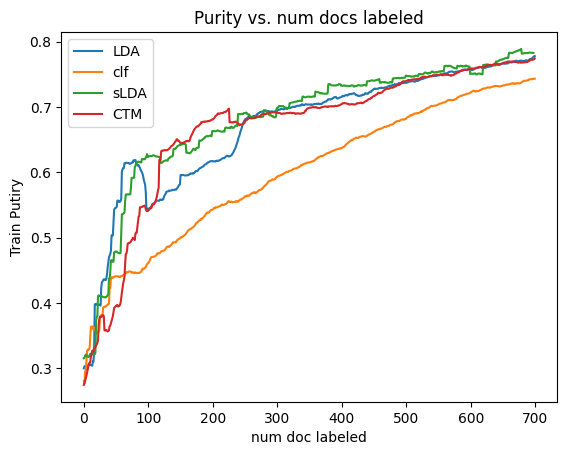

In [10]:
plot_two(1, lists, 'Purity vs. num docs labeled', 'num doc labeled', 'Train Putiry', 0, 700, lengends, True)

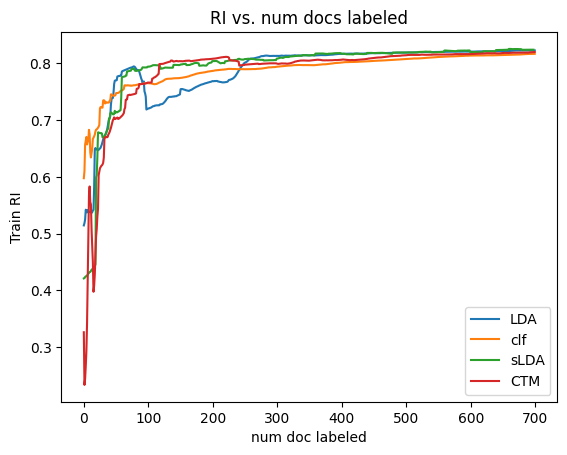

In [14]:
plot_two(2, lists, 'RI vs. num docs labeled', 'num doc labeled', 'Train RI', 0, 700, lengends, True)

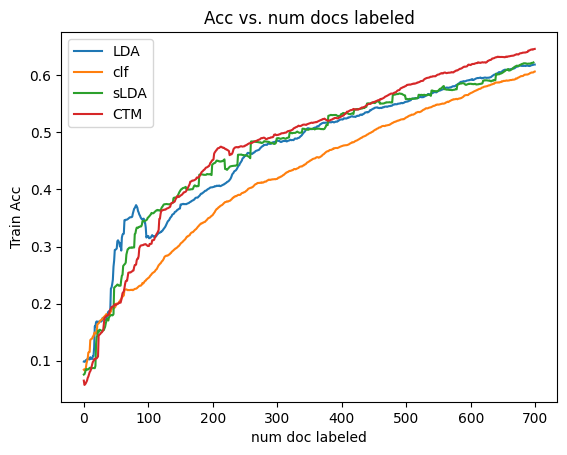

In [18]:
plot_two(0, lists, 'Acc vs. num docs labeled', 'num doc labeled', 'Train Acc', 0, 700, lengends, True)

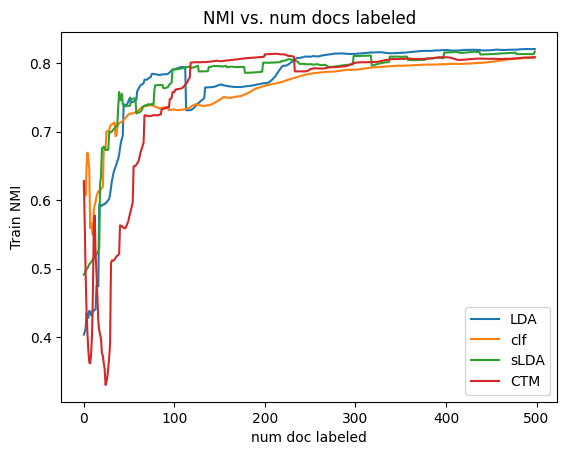

In [9]:
plot_two(2, lists, 'NMI vs. num docs labeled', 'num doc labeled', 'Train NMI', 1, 500, lengends, False)

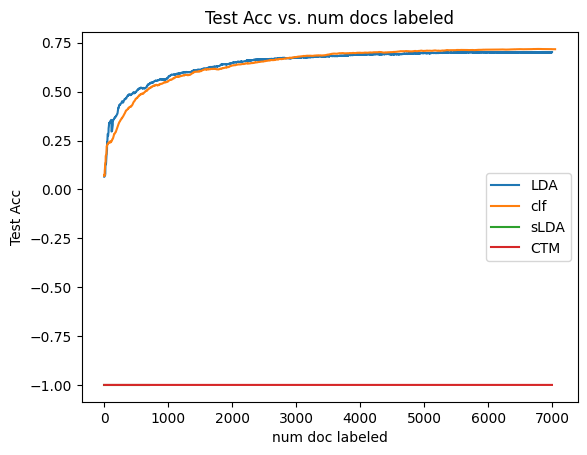

In [10]:
plot_two(4, lists, 'Test Acc vs. num docs labeled', 'num doc labeled', 'Test Acc', 0, 7100, lengends, False)

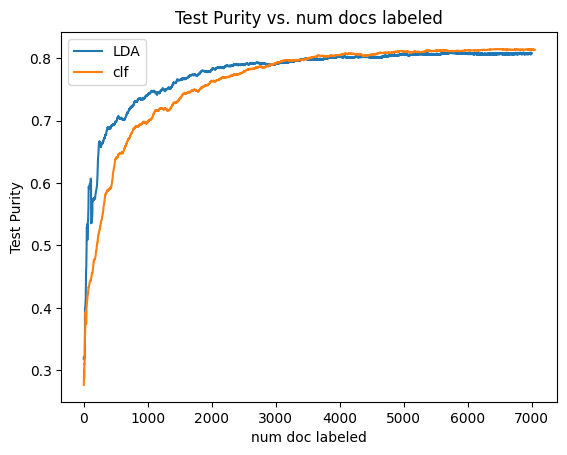

In [16]:
plot_two(5, lists, 'Test Purity vs. num docs labeled', 'num doc labeled', 'Test Purity', 0, 7100, lengends, False)

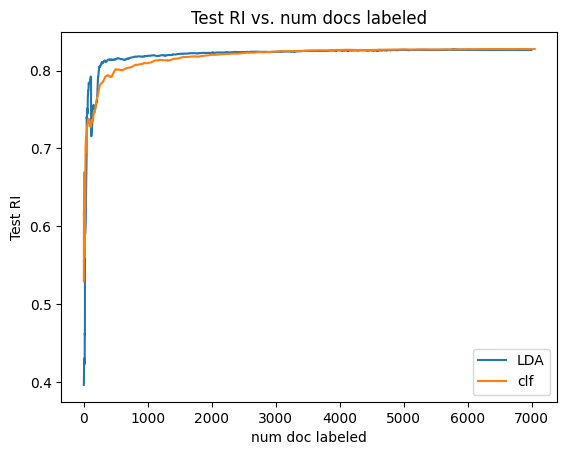

In [17]:
plot_two(6, lists, 'Test RI vs. num docs labeled', 'num doc labeled', 'Test RI', 0, 7100, lengends, False)

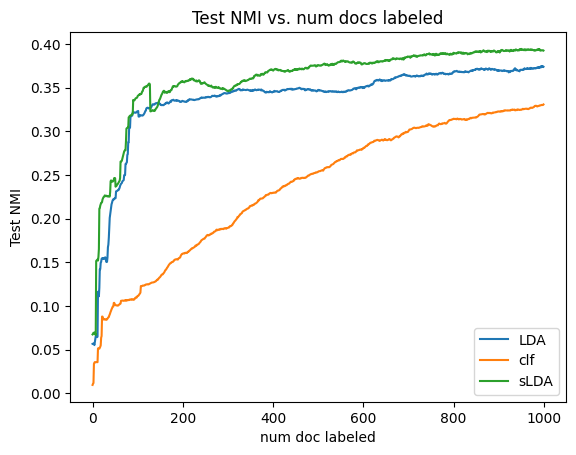

In [75]:
plot_two(7, lists, 'Test NMI vs. num docs labeled', 'num doc labeled', 'Test NMI', 0, 1000, lengends, False)